# Assignment Information

- Assignment: Homework 7
- Author: Charles Hoyt
- Due: June 17, 2016
- Language: R
- Posted: https://github.com/cthoyt/notebooks/blob/master/bit/AbiHomework7.ipynb

# Exercise 1

In [1]:
source("https://bioconductor.org/biocLite.R")
biocLite("colonCA")
library(colonCA)
data(colonCA)

Bioconductor version 3.3 (BiocInstaller 1.22.2), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.3 (BiocInstaller 1.22.2), R 3.3.0 (2016-05-03).
Installing package(s) ‘colonCA’
Old packages: 'GenomicAlignments', 'GenomicRanges', 'httr', 'jsonlite',
  'limma', 'rtracklayer'
Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colnames, do.call,
    duplicated, eval, evalq, Filter, Find, get, grep, grepl, intersect,
    is.unsorted, lapply, lengths, Map, mapply

## Exercise 1A

a) For each gene perform an unpaired t-test to see whether it is differentially
expressed between normal and cancer patients. Consider all genes with p-value <=
0.0001 as differentially expressed. (2 points + 1 bonus point)

In [34]:
exprs = log(exprs(colonCA))
pheno = pData(colonCA)

In [45]:
pvals = apply(exprs, 1, function(row) {
    t = row[pheno$class == 't']
    n = row[pheno$class == 'n']
    test = t.test(t, row[pheno$class == 'n'])
    return(test$p.value)
})

In [48]:
diff = pvals < 0.001
pvals[diff]

Hsa.4689      Hsa.878     Hsa.8068     Hsa.5398     Hsa.5444     Hsa.8125 
2.174232e-04 2.873326e-04 1.045916e-04 3.613332e-04 3.021442e-04 4.034122e-05 
     Hsa.678     Hsa.2800     Hsa.4252      Hsa.957      Hsa.451      Hsa.832 
2.481743e-04 1.702639e-04 2.886699e-04 3.416598e-05 6.949310e-04 2.743750e-04 
     Hsa.951      Hsa.692     Hsa.8147    Hsa.692.1      Hsa.821    Hsa.36689 
1.577002e-04 1.470080e-04 1.733700e-05 2.993763e-04 3.361282e-05 5.097122e-06 
    Hsa.3152     Hsa.5971    Hsa.37937    Hsa.27686      Hsa.831     Hsa.6472 
1.822501e-04 1.475014e-05 2.509106e-07 4.486925e-04 1.514928e-06 5.491099e-05 
     Hsa.853     Hsa.3306     Hsa.7395     Hsa.9972    Hsa.692.2      Hsa.773 
1.815367e-04 9.810029e-06 7.395637e-04 2.714454e-04 1.159368e-04 1.952948e-05 
    Hsa.2863     Hsa.1131    Hsa.36952     Hsa.3331     Hsa.1073     Hsa.9218 
4.726931e-04 2.707898e-04 6.274345e-06 2.612810e-05 5.837703e-04 7.214578e-04 
    Hsa.1205      Hsa.549      Hsa.462      Hsa.490     Hsa.1047     Hsa.8040 
4.441586e-04 5.119072e-07 1.624573e-05 6.215191e-04 2.960514e-04 7.047021e-04 
    Hsa.8781     Hsa.3016     Hsa.5392     Hsa.3263    Hsa.31630     Hsa.1832 
9.309755e-04 9.914918e-05 2.118682e-04 1.773947e-04 4.588979e-04 1.032043e-05 
    Hsa.1410     Hsa.2344     Hsa.2928    Hsa.10664     Hsa.2097      Hsa.662 
4.598145e-04 2.481293e-04 4.529892e-06 6.459947e-04 1.169004e-05 1.675990e-04 
    Hsa.1454      Hsa.627     Hsa.2821     Hsa.2645     Hsa.2250      Hsa.601 
3.691022e-04 4.002933e-06 7.300441e-04 8.721078e-05 2.797800e-04 3.192343e-05 
    Hsa.6814    Hsa.41283     Hsa.2291     Hsa.2705 
2.334715e-06 6.462059e-04 7.387343e-05 2.623129e-04

## Exercise 1B

b) Install R-package EMA and produce heatmaps of the data sub-matrix containing only
these differentially expressed genes. For clustering of genes use complete linkage,
average linkage and Ward’s method using the Pearson correlation “distance”. Do the
results differ for clustering genes differ? (4 points + 1 bonus point)

In [50]:
exprs.diff = exprs[diff, ]

In [52]:
?heatmap

In [ ]:
pearson_dist = function(x) as.dist((1 - cor(t(x))) / 2)

complete = function(x) hclust(x, method="complete")
average = function(x) hclust(x, method="average")
ward = function(x) hclust(x, method="ward")

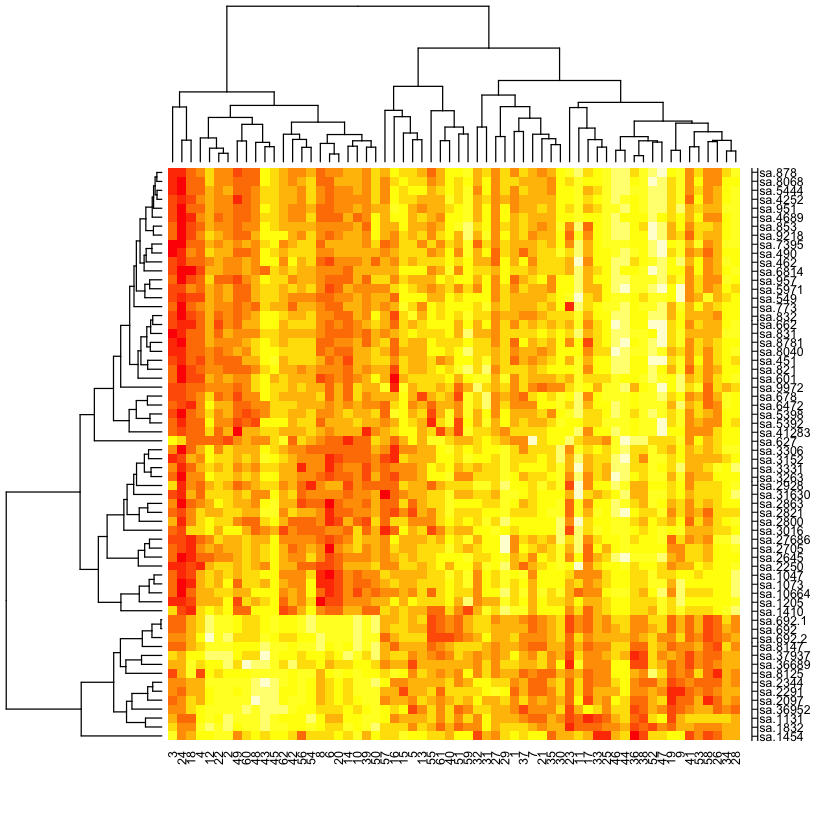

In [62]:
heatmap(exprs.diff, distfun=pearson_dist, hclust=complete)

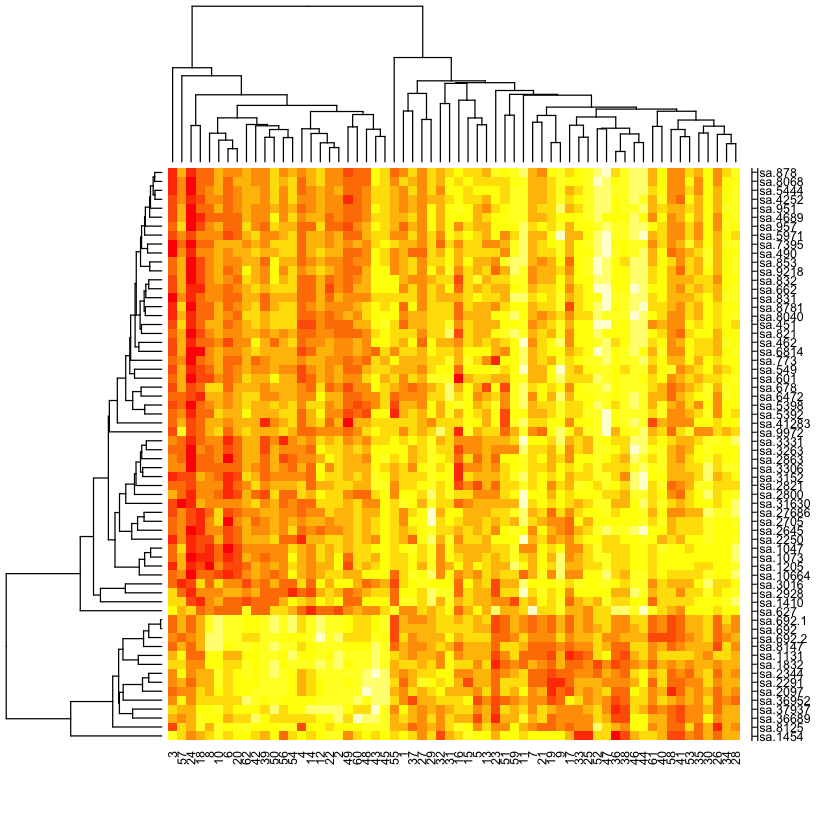

In [63]:
heatmap(exprs.diff, distfun=pearson_dist, hclust=average)

The "ward" method has been renamed to "ward.D"; note new "ward.D2"
The "ward" method has been renamed to "ward.D"; note new "ward.D2"


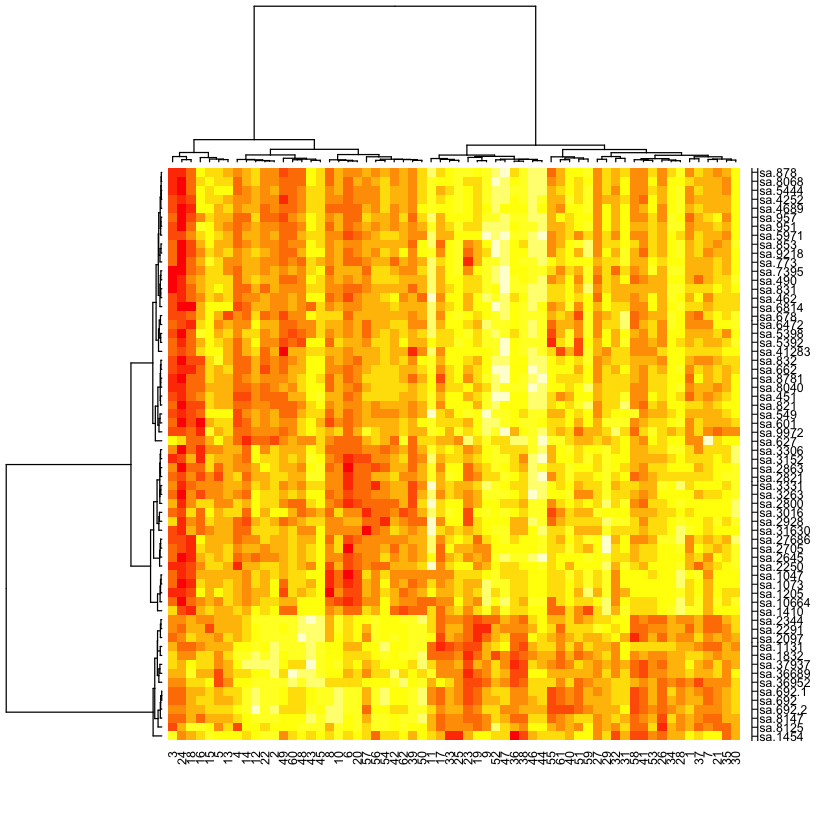

In [64]:
heatmap(exprs.diff, distfun=pearson_dist, hclust=ward)

The results are very similar. There is a lot of signal in these data sets, so the subtlties of using complete (max), average, and ward (centroid) linkages aren't making a huge effect.

## Exercise 1C

Why is the use of the Pearson correlation more appropriate than the Euclidean
distance in this case? (2 points + 1 bonus point)

Pearson correlation is more appropriate than euclidean distance because it elucidates which genes are having the same pattern of regulation across many cell lines, while the numbers themselves might be higher or lower based on the cell line itself. The correlation measures how much two genes change together across cell lines, while the euclidean distance just measures how different they are.

# Exercise 3

Consider a k-means clustering.

## Exercise 3A

Which behavior would you expect, if you plot the distortion in dependency of the
number of clusters? (2 + 1 points)

Distortion is the sum of the suqare of distances from each point to its centroid.

As the number of centroids goes up, the distortion will go down. To determine the number of clusters, one should look for an 'elbow', or inflection point, in this plot

## Exercise 3B

Consider k relatively well separated clusters, which can be embedded into spheres.
Would GMM clustering yield a very different result than k-means? (2 + 1points)

Gaussian mixture model maximizes the likelihood that a set of data points came from a certain number of multivariate gaussian functions. In doing so, it assigns parameters to define each of thse functions. Assuming GMM is looking for k different gaussians, it should provide similar results. GMM is a more complex model that can be employed when the clusters are less well seperated.

# Exercise 4

Which of the clustering algorithms discussed in the lecture so far can you apply to
cluster biological sequences? Give reason for your answer! (2 + 1 points)

All that is necessary to apply k-means or heirarchical clustering is a distance function. For biological sequences, one distance function is the edit distance. Other, more complicated, distance functions and scoring functions exist that are based on sequence alignments.

GMM can be less readily appliet to biological sequences because it works best for multivariate distributions over the real numbers.